# Grafo dirigido de normas ARN

In [1]:
# bibliotecas
import re
import cv2
import glob

In [2]:
path = "normas_texto/*.txt"

adj_list={}
for file in glob.glob(path):
  with open(file, "r") as f:
      lines = f.readlines()
  texto=" ".join(lines).replace("\n","")
  p = re.compile("AR (\d+\.\d+\.\d+)")
  result = p.findall(texto.upper())
  adj_list[result[0]]=[i for i in result if i!=result[0]]

print(adj_list)

{'3.4.3': ['3.1.3', '3.1.3', '3.1.3'], '4.1.3': [], '3.4.1': ['3.1.3', '3.1.3'], '4.9.1': [], '4.8.1': ['4.7.2', '3.6.1'], '3.2.1': ['3.1.3'], '3.5.1': [], '4.2.1': [], '10.13.2': ['10.13.1', '10.16.1'], '6.7.1': [], '8.11.1': [], '3.2.3': [], '10.10.1': ['3.1.3'], '8.2.3': [], '3.3.2': ['3.1.3'], '5.7.1': [], '4.9.2': ['4.2.2'], '3.3.3': [], '8.2.4': [], '3.3.1': ['3.1.3'], '0.0.1': [], '8.11.3': [], '7.11.2': [], '5.1.1': [], '0.11.1': [], '3.1.1': [], '8.11.2': ['8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1'], '3.10.1': ['3.1.3'], '4.2.3': ['4.5.1'], '3.7.1': [], '8.2.1': ['10.16.1'], '10.1.1': [], '3.1.3': [], '6.1.2': [], '8.2.2': [], '4.8.2': ['4.7.1', '3.6.1'], '4.7.1': [], '10.16.1': [], '3.9.2': [], '7.9.2': ['10.16.1', '10.12.1'], '3.4.2': ['3.1.3'], '4.1.1': [], '10.13.1': [], '6.1.1': [], '10.14.1': [], '4.1.2': [], '2.12.1': [], '7.11.1': [], '6.2.1': [

## Grafo no dirigido

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
G = nx.from_dict_of_lists(adj_list)

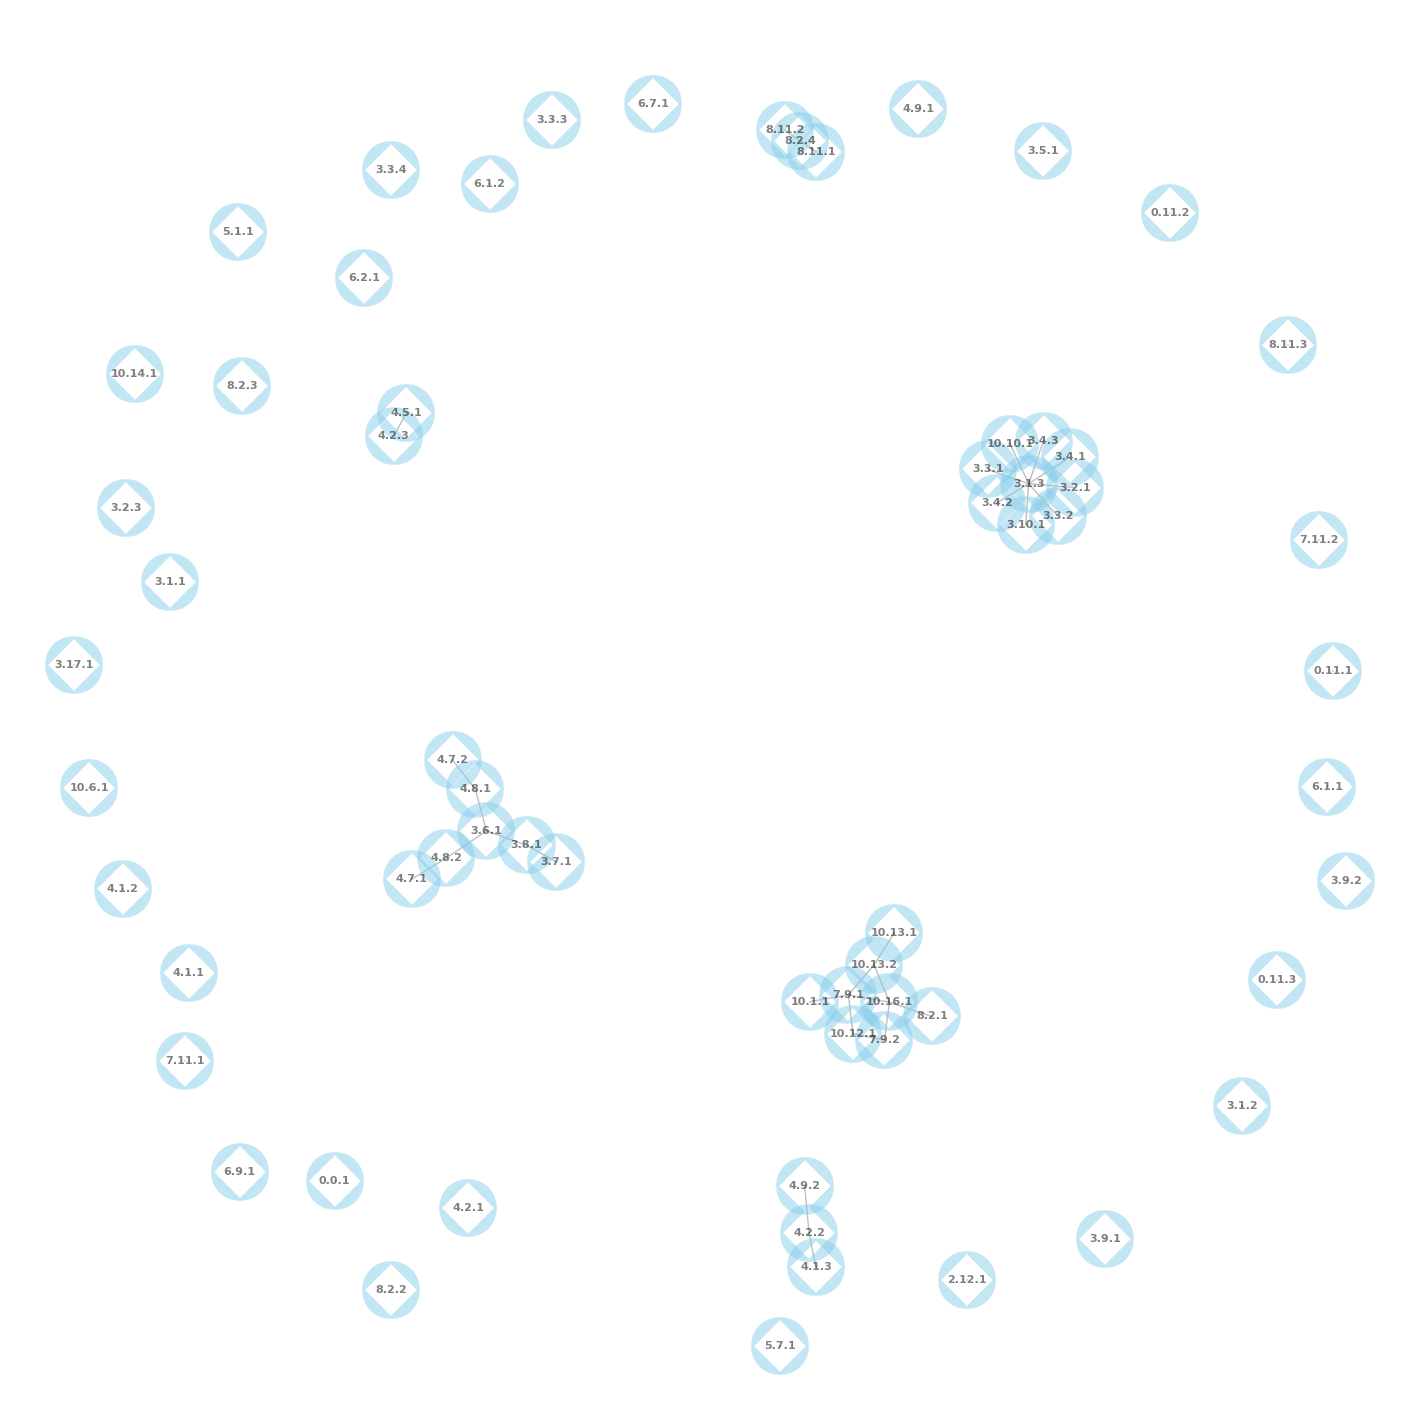

In [5]:
plt.figure(3,figsize=(14,14))
nx.draw(G, with_labels = True, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", edge_color="gray", font_weight="bold", font_family="sans-serif")
plt.show()

## Grafo direcionado

In [8]:
# what alternatives are there to the spring layout?
# pos = nx.circular_layout(G)  # positions for all nodes
# pos = nx.random_layout(G)  # positions for all nodes
# pos = nx.shell_layout(G)  # positions for all nodes
# pos = nx.spectral_layout(G)  # positions for all nodes
# pos = nx.spring_layout(G)  # positions for all nodes
# pos = nx.kamada_kawai_layout(G)  # positions for all nodes
# pos = nx.planar_layout(G)  # positions for all nodes
# pos = nx.spiral_layout(G)  # positions for all nodes
# pos = nx.multipartite_layout(G)  # positions for all nodes
# pos = nx.fruchterman_reingold_layout(G)  # positions for all nodes
# pos = nx.shell_layout(G)  # positions for all nodes
# pos = nx.bipartite_layout(G, G.nodes)  # positions for all nodes
# pos = nx.rescale_layout(G)  # positions for all nodes


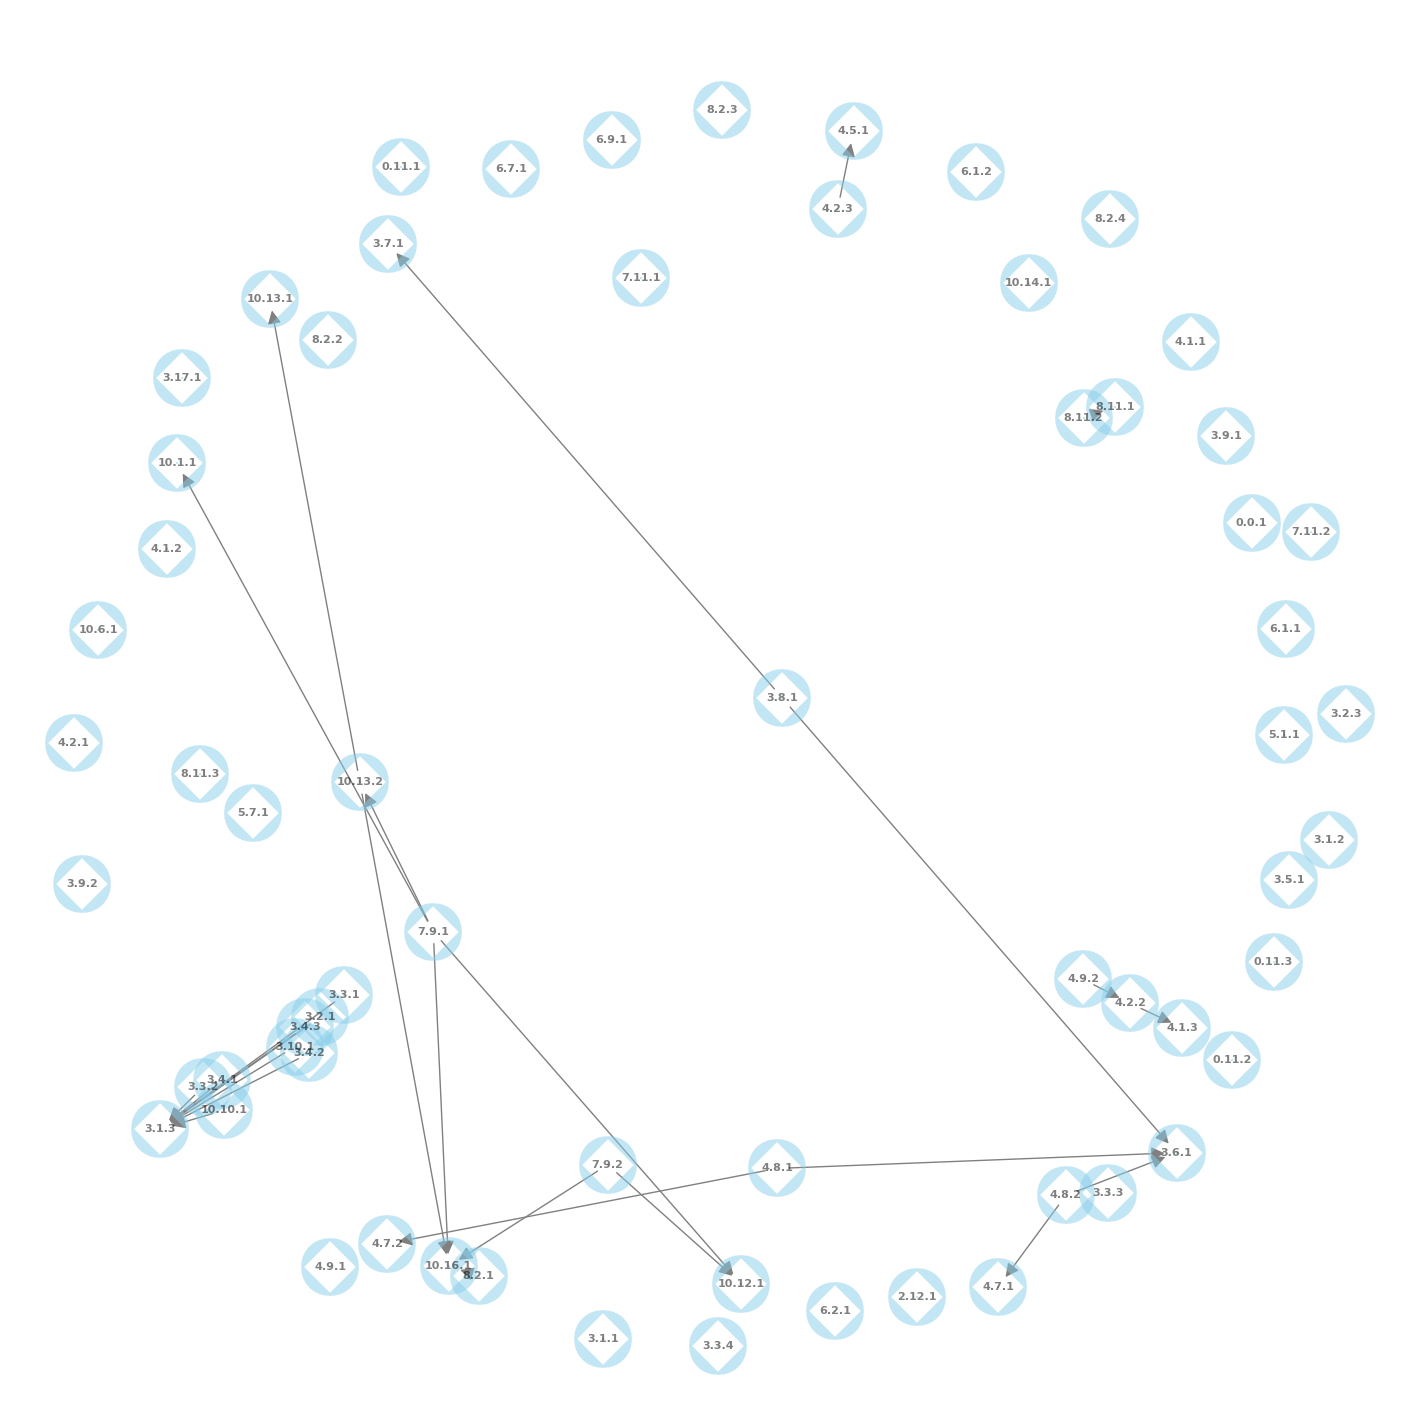

In [32]:
# Create a directed graph from the adjacency list
G = nx.DiGraph(adj_list)

# Draw the directed graph
plt.figure(3,figsize=(14,14))
pos = nx.spring_layout(G)  # positions for all nodes
# pos = nx.fruchterman_reingold_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels = True, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", font_weight="bold", font_family="sans-serif", edgelist= [])
# nx.draw(G, pos, with_labels = True, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", font_weight="bold", font_family="sans-serif", edge_color="white")

# Draw directed edges with arrows
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')

# Show the plot
plt.show()


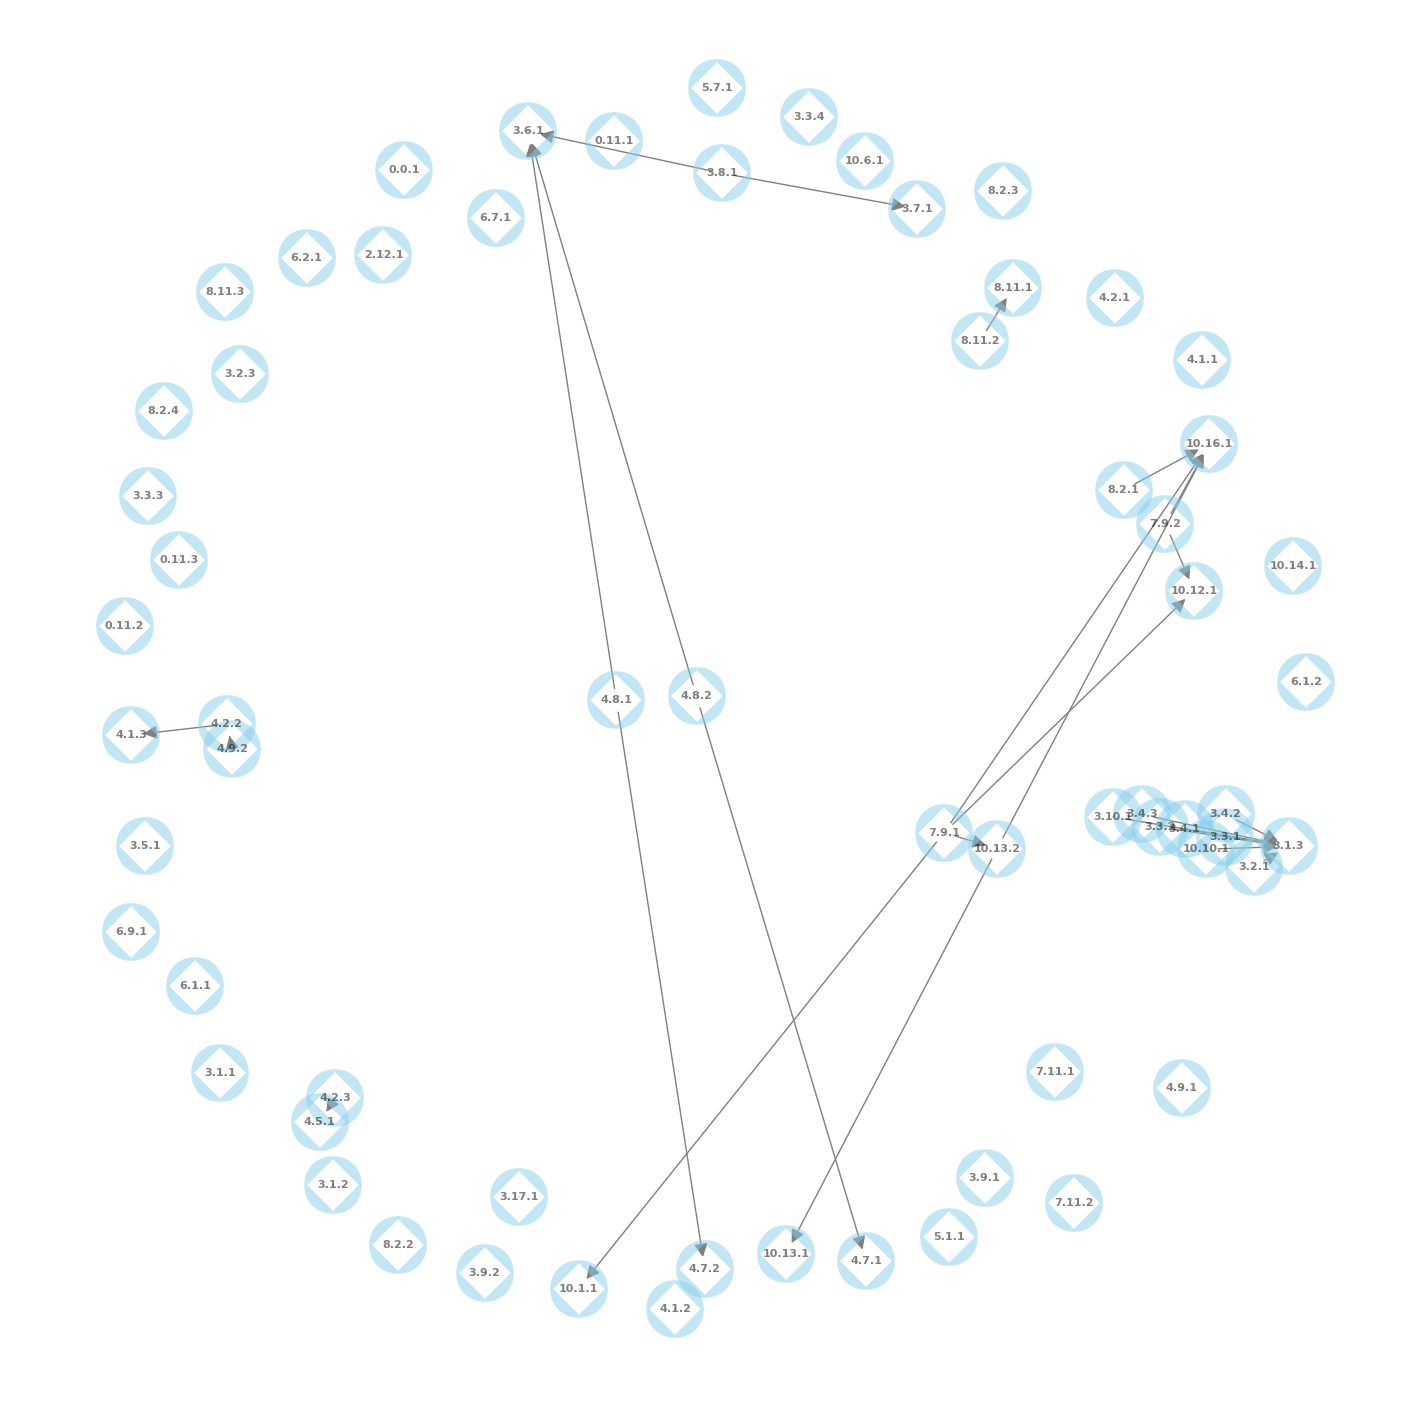

In [33]:
# Create a directed graph from the adjacency list
G = nx.DiGraph(adj_list)

# Draw the directed graph
plt.figure(3,figsize=(14,14))
pos = nx.spring_layout(G)  # positions for all nodes
# pos = nx.fruchterman_reingold_layout(G)  # positions for all nodes
# nx.draw(G, pos, with_labels = True, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", font_weight="bold", font_family="sans-serif", edgelist= [])
nx.draw(G, pos, with_labels = True, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", font_weight="bold", font_family="sans-serif", edge_color="white")

# Draw directed edges with arrows
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')

# Show the plot
plt.show()
